# Basics of Deep Learning using PyTorch
PyTorch is a Python package that allows for ease of creating ML models. It has a host of functions that make creating forward prop and back prop easier

In [46]:
# import the necessary packages
import numpy as np
import torch
import matplotlib.pyplot as plt
import random

## Tensor Basics
tensors are the basic units that you work with when creatin ML models. They are like numpy arrays and represent matrices, which allow you to perform calculations very quickly with matrix math compared to creating many for-loops to run through. This section has some basic things that you can do with pytorch tensors

In [3]:
# creating some tensors for use in the following sections
x = torch.rand(5,3)
y = torch.rand(5,3)

### Some element-wise operations

In [4]:
# element-wise and in-place addition
a = torch.add(x, y)
a.add_(x)

# element-wise and in-place subtraction
b = torch.sub(x, y)
b.sub_(x)

# element-wise and in-place multiplication
c = torch.mul(x, y)
c.mul_(x)

# element-wise and in-place division
d = torch.div(x, y)
d.div_(x)

print(a)
print(b)
print(c)
print(d)

tensor([[2.5934, 0.9493, 1.1120],
        [0.9743, 0.6347, 1.8129],
        [1.3310, 1.9238, 1.6887],
        [2.0307, 2.4931, 1.4076],
        [0.7000, 2.0945, 0.4425]])
tensor([[-0.6809, -0.4478, -0.2381],
        [-0.3533, -0.5480, -0.3688],
        [-0.6232, -0.5482, -0.3791],
        [-0.7224, -0.6144, -0.1976],
        [-0.5163, -0.6787, -0.3701]])
tensor([[6.2260e-01, 2.8157e-02, 4.5461e-02],
        [3.4062e-02, 1.0295e-03, 1.9226e-01],
        [7.8057e-02, 2.5933e-01, 1.6254e-01],
        [3.0911e-01, 5.4213e-01, 7.2321e-02],
        [4.3589e-03, 3.4011e-01, 4.8568e-04]])
tensor([[1.4685, 2.2331, 4.2003],
        [2.8302, 1.8247, 2.7116],
        [1.6047, 1.8242, 2.6377],
        [1.3844, 1.6277, 5.0612],
        [1.9370, 1.4735, 2.7021]])


### Slice operations

In [6]:
# using the same tensors created in the section before
print(x)      # show the entire tensor
print(x[:,1]) # gets the first column
print(x[1,:]) # gets the first row
print(x[1,1]) # gets the value at the (1,1) space

tensor([[0.9562, 0.2508, 0.4370],
        [0.3105, 0.0433, 0.7220],
        [0.3539, 0.6878, 0.6548],
        [0.6542, 0.9394, 0.6050],
        [0.0919, 0.7079, 0.0362]])
tensor([0.2508, 0.0433, 0.6878, 0.9394, 0.7079])
tensor([0.3105, 0.0433, 0.7220])
tensor(0.0433)


### Resizing tensors

In [9]:
# use the view function - the product of the dimensions must be the same
z = x.view(15, 1)
print(z)
z = y.view(-1, 5) # the -1 means 'whatever is left' - it will auto size
print(z)

tensor([[0.9562],
        [0.2508],
        [0.4370],
        [0.3105],
        [0.0433],
        [0.7220],
        [0.3539],
        [0.6878],
        [0.6548],
        [0.6542],
        [0.9394],
        [0.6050],
        [0.0919],
        [0.7079],
        [0.0362]])
tensor([[0.6809, 0.4478, 0.2381, 0.3533, 0.5480],
        [0.3688, 0.6232, 0.5482, 0.3791, 0.7224],
        [0.6144, 0.1976, 0.5163, 0.6787, 0.3701]])


### Converting from numpy ndarrays to pytorch tensors and vice-versa

In [11]:
# from tensor to ndarray
e = a.numpy() # both e and a point to the same tensor - so changing one will change the other
print(e)

# from ndarray to tensor
a = torch.from_numpy(e) # both e and a point to the same tensor - so changing one will change the other
print(a)

[[2.593351   0.9493178  1.1120331 ]
 [0.9743099  0.6347309  1.8128557 ]
 [1.3310056  1.9237852  1.6886619 ]
 [2.030662   2.4931161  1.4075922 ]
 [0.7000372  2.0945072  0.44253206]]
tensor([[2.5934, 0.9493, 1.1120],
        [0.9743, 0.6347, 1.8129],
        [1.3310, 1.9238, 1.6887],
        [2.0307, 2.4931, 1.4076],
        [0.7000, 2.0945, 0.4425]])


## Autograd
autograd is a package in pytorch that allows for automatically creating gradient descent in pytorch tensors. <br>
gradient descent and gradients are central to creating ML models because this is how you train a model. Therefore, this package is central to the pytorch <br>
<br>
When performing an operation on a tensor using autograd, pytorch creates a computation graph which automatically stores a function that is the gradient (slope) of the node. This is convenient for use during back propogation because the function is already stored rather than it needing to be calculated every time.

### Autograd features

In [18]:
x = torch.randn(3, requires_grad=True) # let the tensor know whether it can use autograd

y = x + 2        # creates a computation graph - has an attribute that is the derivative of tensor + 2
z = y * y * 2
z = z.mean()
print(z)         # the 'grad_fn' attribute is the gradient function

z.backward()     # backward propogation dcomp/dtensor - tensor has attribute that stores grad values
print(x.grad)

tensor(18.7854, grad_fn=<MeanBackward0>)
tensor([2.8655, 1.9139, 6.1823])


### Example of gradient calculation

In [21]:
# with ML models, we need to calculate gradient descent - this is a simple example using a linear function
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    modelOutput = (weights * 3).sum()       # (weights * 3) is function, .sum() creates one attr so backwards() can be called
    modelOutput.backward()
    print(weights.grad)                     # if stop here, it will calculate the change from the starting position (ones)
                                            # but, we want to calculate for each step, therefore, we reset the grads at each step
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Gradient Descent using Autograd
gradient descent is the backbone of ML models - it makes the model more accurate - this is a quick intro on using gradient descent with pytorch autograd

### Backpropogation
backpropogation is an essential step in deep learning. Here, based on the accuracy of the forward propogation step, you calculate the gradient descent and which set of parameters to test next

#### An example

In [23]:
# initialize the input and expected result
x = torch.tensor(1.0)
y = torch.tensor(2.0)

# initialize the weights
w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute loss
yhat = w * x
loss = (yhat - y)**2
print(loss)

# backward pass and compute grads - computed automatically because we specified require_grad
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### Gradient Descent
In a typical ML model, you would throw all of this in a for loop and do it multiple times to make the prediction more accurate. This next portion will show that

#### Using only numpy
First, to ensure understanding of how these models work, implement using only numpy

Prediction before training: x=5, y=4.260226058706072
epoch: 1, w: 1.3204107207744176, loss: 33.60390090942383
epoch: 2, w: 1.5976831206767614, loss: 11.776960372924805
epoch: 3, w: 1.7618284148662147, loss: 4.127401828765869
epoch: 4, w: 1.8590024108378944, loss: 1.4465053081512451
epoch: 5, w: 1.9165294417827186, loss: 0.5069484710693359
epoch: 6, w: 1.9505854491679724, loss: 0.17766721546649933
epoch: 7, w: 1.970746562906986, loss: 0.062265701591968536
epoch: 8, w: 1.982681985804325, loss: 0.021822046488523483
epoch: 9, w: 1.9897477421252783, loss: 0.007647811435163021
epoch: 10, w: 1.993930663058048, loss: 0.002680273959413171
epoch: 11, w: 1.9964069473235662, loss: 0.0009393357904627919
epoch: 12, w: 1.9978729242770725, loss: 0.00032921083038672805
epoch: 13, w: 1.9987407638518864, loss: 0.00011537156387930736
epoch: 14, w: 1.9992545232265049, loss: 4.043331500724889e-05
epoch: 15, w: 1.9995586933581881, loss: 1.417271232639905e-05
Prediction after training: x=5, y=9.99779346679094

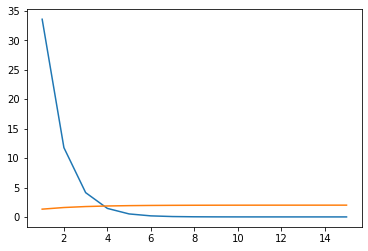

In [49]:
# linear regression so - function = weight * sample

# initialize our training samples
X = np.array([1,2,3,4,5,6,7,8], dtype=np.float32)
Y = np.array([2,4,6,8,10,12,14,16], dtype=np.float32)

# initialize our weight
w = random.random()

# calculate model prediction
def forward(x):
    return w * x

# calculate loss - mean squared error
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# calculate gradient - the derivative of the loss with respect to the weights
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

# prediction before training
print('Prediction before training: x=5, y=' + str(w*5))

# training the model
lr = 0.001
n_iters = 15
epochs = []
losses = []
weights = []
for epoch in range(1, n_iters+1):
    # forward pass
    y_pred = forward(X)

    # compute the loss
    l = loss(Y, y_pred)
    epochs.append(epoch)
    losses.append(l)

    # update the weights
    dW = gradient(X, Y, y_pred)
    w -= lr * dW
    weights.append(w)
    
    # update the epochs
    if epoch % 1 == 0:
        print(f'epoch: {epoch}, w: {w}, loss: {l}')

# print the loss
plt.plot(epochs, losses)
plt.plot(epochs, weights)

# prediction after training
print('Prediction after training: x=5, y=' + str(w*5))

#### Backprop with PyTorch
for the backward propogation

In [66]:
# linear regression so - function = weight * sample

# initialize our training samples
X = torch.tensor([1,2,3,4,5,6,7,8], dtype=torch.float32)
Y = torch.tensor([2,4,6,8,10,12,14,16], dtype=torch.float32)

# initialize our weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate model prediction
def forward(x):
    return w * x

# calculate loss - mean squared error
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# prediction before training
print(f'Prediction before training: x=5, y={forward(5).item()}')

# training the model
lr = 0.01
n_iters = 20
epochs = []
losses = []
weights = []
for epoch in range(1, n_iters+1):
    # forward pass
    y_pred = forward(X)

    # compute the loss
    l = loss(Y, y_pred)
    epochs.append(epoch)
    losses.append(l.item)

    # update the weights
    l.backward()
    with torch.no_grad():
        w -= lr * w.grad

    # set the gradients to 0 again
    weights.append(w.item)
    w.grad.zero_()
    
    # update the epochs
    if epoch % 2 == 0:
        print(f'epoch: {epoch}, w: {w}, loss: {l}')

# prediction after training
print(f'Prediction after training: x=5, y={forward(5).item()}')

Prediction before training: x=5, y=0.0
epoch: 2, w: 1.5197999477386475, loss: 24.49020004272461
epoch: 4, w: 1.8847039937973022, loss: 1.4118115901947021
epoch: 6, w: 1.9723174571990967, loss: 0.0813881903886795
epoch: 8, w: 1.9933533668518066, loss: 0.004691871348768473
epoch: 10, w: 1.9984041452407837, loss: 0.0002704716462176293
epoch: 12, w: 1.9996168613433838, loss: 1.5594378055538982e-05
epoch: 14, w: 1.9999079704284668, loss: 8.987138926386251e-07
epoch: 16, w: 1.999977946281433, loss: 5.1823555224927986e-08
epoch: 18, w: 1.9999946355819702, loss: 3.004425153108059e-09
epoch: 20, w: 1.999998688697815, loss: 1.7278267705478356e-10
Prediction after training: x=5, y=9.999993324279785


#### Training Pipeline with PyTorch
Using more pytorch modules including the optimizer and loss calculation<br>
In training a model with PyTorch, use the following steps: <br>
1. design the model (input size, output size, forward pass)
2. construct the loss and optimizer
3. create the training loop 
    1. forward pass...compute the prediction
    2. backward pass...gradients
    3. update the weights...to increase accuracy

In [78]:
# a new package
import torch.nn as nn # a neural network module

# linear regression so - function = weight * sample

# initialize our training samples
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
XTest = torch.tensor([5], dtype=torch.float32)

# get the size of input
n_samples, n_features = X.size()

inputSize = n_features
outputsize = n_features

# initialize the model
model = nn.Linear(inputSize, outputsize)

# prediction before training
print(f'Prediction before training: x=5, y={model(XTest).item():.3f}')

# training the model
lr = 0.01
n_iters = 100

# define the loss and optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

for epoch in range(1, n_iters+1):
    # forward pass
    y_pred = model(X)

    # compute the loss
    l = loss(Y, y_pred)

    # update the weights
    l.backward()
    optimizer.step()

    # set the gradients to 0 again
    optimizer.zero_grad()
    
    # update the epochs
    if epoch % 10 == 0:
        w, b = model.parameters()
        print(f'epoch: {epoch}, w: {w[0][0]:.3f}, loss: {l:.3f}')

# prediction after training
print(f'Prediction after training: x=5, y={forward(5).item():.3f}')

Prediction before training: x=5, y=0.001
epoch: 10, w: 1.657, loss: 1.198
epoch: 20, w: 1.908, loss: 0.034
epoch: 30, w: 1.950, loss: 0.003
epoch: 40, w: 1.958, loss: 0.002
epoch: 50, w: 1.960, loss: 0.002
epoch: 60, w: 1.961, loss: 0.002
epoch: 70, w: 1.963, loss: 0.002
epoch: 80, w: 1.964, loss: 0.002
epoch: 90, w: 1.965, loss: 0.002
epoch: 100, w: 1.966, loss: 0.002
Prediction after training: x=5, y=9.829
